# Diabetes in The United States: An Analysis of the NHANES 2017-2018 database

Michael Giurcanu

# Executive Summary


This study illustrates the use of statistical and machine learning data science techniques to explore  the effects of risk factors on clinical outcomes and  chronic conditions using a national data set representative of the US population. The datasets used in this project originate from the 2017-2018 NHANES (National Health and Nutrition Examination Survey) survey, which can be found on the CDC (Center for Disease Control and Prevention) website (Centers for Disease Control and Prevention, 2020). The datasets I used in this analysis  are collected from the following data sets, which are described alongside their file name: DEMO_J.XPT (demographics data), BMX_J.XPT (body mass indices),  BPX_J.XPT (blood pressure outcomes), and DIQ_J.XPT (diabetes status). All these files are in sas export format, which were exported in csv (comma separated value) format for further processing. I combined these datasets using pandas (a Python library using RStudio IDE) using an INNER MERGE with SEQN identifier (unique  participant identification number) as the primary key for merging. I constructed models designed to predict three distinct clinical parametersᅳsystolic blood pressure (BPS), diastolic blood pressure (BPD), and diabetes status. Employing statistical tools, such as linear regression and logistic regression, as well as machine learning tools such as deep learning networks, I created prediction models for BPS, BPD, and diabetes status in terms of race, sex, age, BMI, and pulse rate. However, due probably to lack of information on additional risk factors (such as diet, exercise, and sleep), their efficacy is somewhat limited, explaining roughly 30-45% of the variation in the outcomes for BPS and BPD (for both the training and test data). In the case of prediction models for diabetes status, the receiving operating characteristic(ROC) curve identified a cutoff probability of about 0.13 that maximizes the sum of sensitivity and specificity for the training data, producing overall accuracies of 70% for both the training and test data. I then discuss other’s research, connecting Dr. Robert Lustig research with my own, and provide ideas as onto how the project can be improved on.

# Introduction

In the current day world, there are many aspects of life one needs to take into account for a long, healthy, and happy life. However, as current data shows, only a small fraction of the US population manages to do so; an estimated 40% of adults of the United States population have multiple chronic conditions (Centers for Disease Control and Prevention, 2015). One of the largest medical expenses in the United States for a chronic condition is Diabetes, leading the average annual costs towards health care at 330 billion dollars, and 90 billion in lost economic productivity. Of the 3.8 trillion dollars spent on healthcare, 90% can be attributed to chronic conditions (Inc H., 2023).






Half of the US’s population is diagnosed with high pressure. Considering the fact that diabetes and hypertension can often be correlated with one another, it can be confirmed that one usually leads to the other, or that they may happen in tandem, often with similar consequences. Blood vessels, especially in those who are of older age, are most susceptible to ruptures (Centers for Disease Control and Prevention, 2020). Hypertension is reversible, and though type I diabetes is incurable, type II diabetes is reversible through diet and lifestyle changes (Heart disease and stroke statistics, 2017).






Diabetes is a medical condition that affects a great portion of the US population as a whole and is a global issue worldwide. Among the US general population, there is an estimated 14.7% of adults, those aged 18 and over, who are diagnosed to have diabetes. Globally, diabetes claims one in every nine deaths and is a leading medical disease in terms of death rate and costs for treatment, averaging at $16,000 (Hayes, 2020). In the United States, an estimated 200% in costs compared to their non-diabetic counterparts. Diabetes is mainly found in adults over 45, and after 65 years of age, almost one in three people are found to have this chronic disease (Diabetesjournals.org, 2020). There are serious consequences of diabetes, such as vision loss, heart disease, increased risk of stroke, embolism, and kidney disease. Among patients diagnosed as diabetic, the leading cause of mortality is vascular disease (NCD Alliance, 2022).


# Data processing

I first downloaded the sas export files (DEMO_J.XPT, DIQ_J.XPT, BPX_J.XPT, and BMX_J.XPT) from the NHANES website and saved them in a local directory. The data processing and analysis is conducted using RStudio, the data analysis source file is an R-Markdown file, and Python and R commands are used in various chunks of the source file. First, I imported the files using python libraries (pandas, numpy, matplotlib, and seaborn), merged the files with an “INNER MERGE” command using SEQN (the sequence number of the patient interviewed) as the primary key, selected the demographics variables of Sex, Race, and Age, vital signs as BMI and Pulse, clinical parameters with BPS (systolic blood pressure) and BPD(diastolic blood pressure), and chronic condition Diabetes, coded as a dichotomous variable.


In [ ]:

#    merged_inner_1 = pd.merge(left=demo, right=bmi_m, left_on="SEQN", right_on="SEQN")
#    merged_inner_2 = pd.merge(left=merged_inner_1, right=bld_pr, left_on="SEQN", right_on="SEQN")
#    combined = pd.merge(left=merged_inner_2, right = diabetes, left_on="SEQN", right_on = "SEQN")

#    combined.head()

#    health = combined[["RIDRETH3","RIAGENDR","RIDAGEYR","BMXBMI","BPXPLS","BPXPULS","BPXSY2", "BPXDI2", "DIQ010"]]

#    health = health.rename(columns={"RIDRETH3": "RACE","RIAGENDR": "SEX", "RIDAGEYR" : "AGE", "BMXBMI": "BMI", "BPXPLS":"PULSE_P/M", "BPXPULS":"PULSE_TYPE", "BPXSY2":"BLD_PRE_S", "BPXDI2":"BLD_PRE_D", "DIQ010":"DIABETES"}



Some data included numbers instead of string values for variables Race, Diabetic, Pulse Type, Sex, so I also changed these values into strings based off of the documentation given in NHANES. Any and all notation is copied directly from the CDC’s website.

After merging all databases into one large database named “health”, I exported it into a csv file, and then reopened it in R-Markdown. The first part of the data processing was to rename the variables, using the following command. While conducting my analysis, I realized that interpreting the intercept of any of my models was hard to understand and describe. Thus, I decided to center my data, so that the intercept was now a value that showed the common stats among the average white female(a common practice in statistics is to use the most common person-type as the base, and compare the rest of the populus to them, and with people who have a sex of Female, and race-type input as white, being the largest sample they were selected to be the base group).


In [ ]:
#    health.to_csv("health_data.csv", sep=',', index=False, encoding='utf-8')


#    mydata$Race <- case_match(mydata$Race,
#        "HISPANIC" ~ "Hispanic",
#        "MEX_AMER" ~ "Mex_Amer",
#        "N_H_ASIAN" ~ "Asian",
#        "N_H_BLACK" ~ "Black",
#        "N_H_WHITE" ~ "White",
#        "O_R_MULTI" ~ "Other")



#    mydata$Sex <- case_match(mydata$Sex,
#        "FEMALE" ~ "Female",
#        "MALE" ~ "Male")

#    mydata$Diabetes <- case_match(mydata$Diabetes,
#        "9.0" ~ NA,
#        "BORDERLINE" ~ "Yes",
#        "NO" ~ "No",
#        "YES" ~ "Yes")



### CENTERING DATA ###

#    mydata$Age.c <- scale(mydata$Age, scale = FALSE)
#    summary(mydata$Age.c)
#    mydata$BMI.c <- scale(mydata$BMI, scale = FALSE)
#    summary(mydata$BMI.c)
#    mydata$Pulse.c <- scale(mydata$Pulse, scale = FALSE)
#    summary(mydata$Pulse.c)


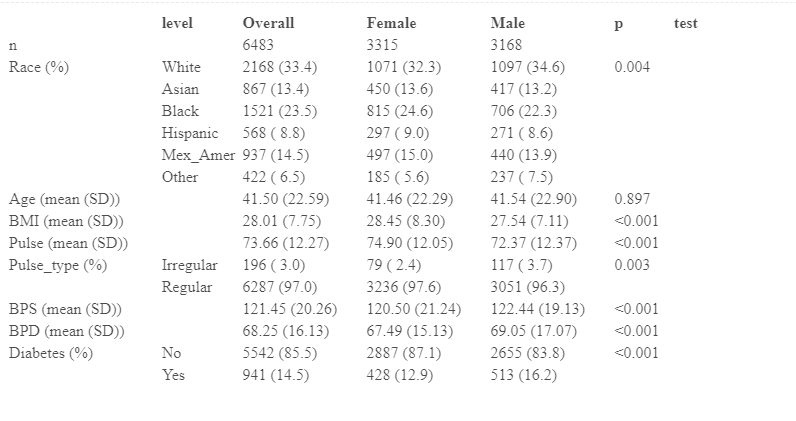

# Methods

I first summarize the variables overall and stratified by Sex and Race. Then, I calculated the pairwise correlations between the continuous variables (Age, BMI, Pulse, BPS, BPD). This is represented with a correlation plot as seen below.

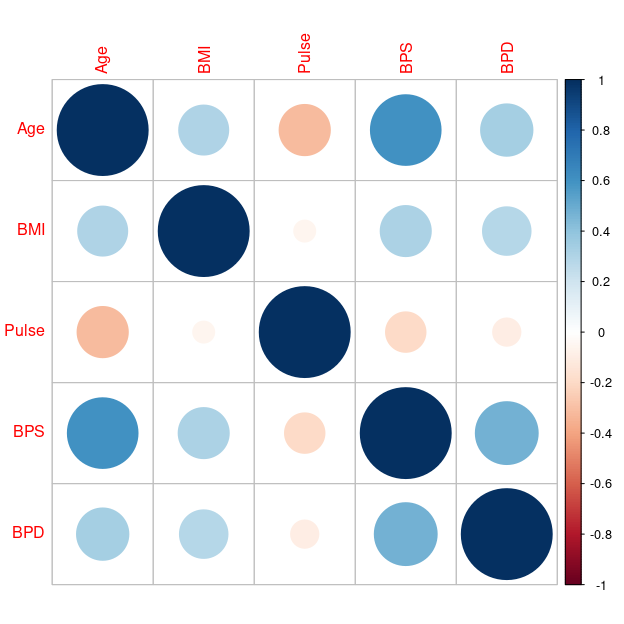

I plotted the continuous variables over time to identify any semblance of trends.

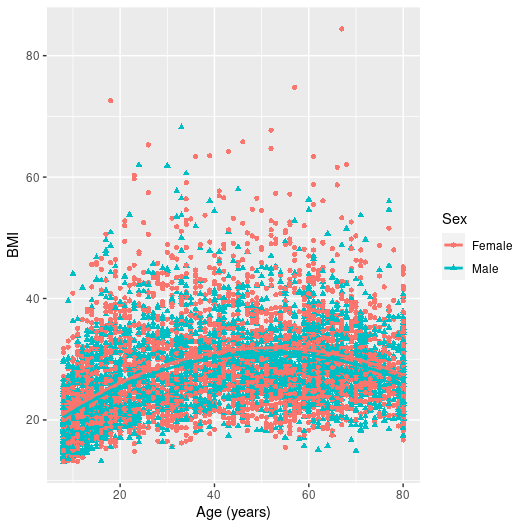

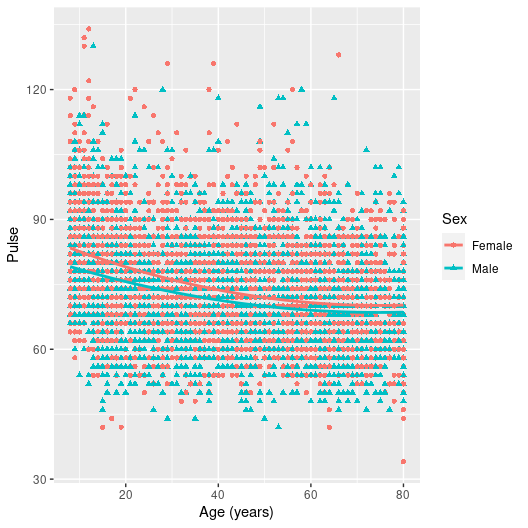

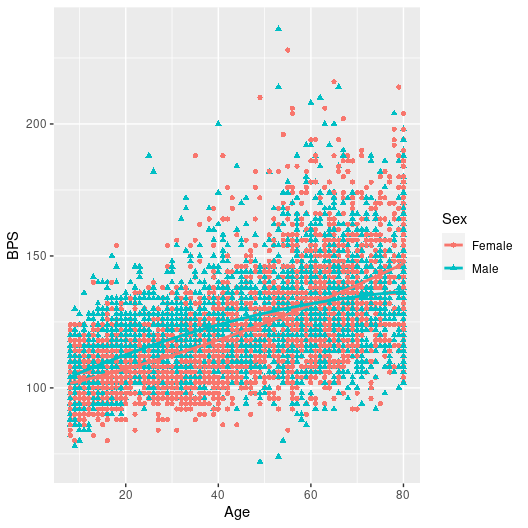

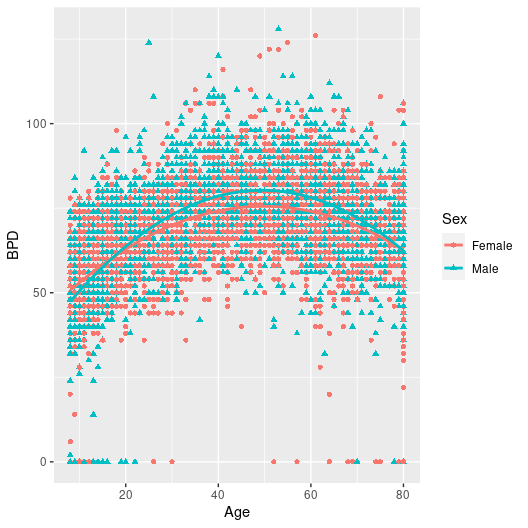

Then, I conducted best subset regression methods in RStudio to identify predictors associated with BPS and BPD and selected the models with the largest adjusted coefficient of determination (R2). I partitioned the data in two subsets: a training data set (used to estimate the models) and a test data set (used to assess the prediction performance of the models). This is accomplished by generating a sequence of independent and identically distributed binary variables with probability of success p = 0.70 (and thus, approximately 70% of the observations will be in the training set and 30% in the test set). Then I fitted linear regression models (BPS and BPD) and a logistic regression model (Diabetes) on the training set and calculated prediction performance on the test set. Lastly, I also fitted neural network deep learning models using keras and tensorflow with input layers of 15 parameters (interactions between Sex and Race, Age, BMI, and Pulse), with two hidden layers (dense layers with “relu” activation functions), and an output layer with a linear activation function for BPS and BPD and softmax activation function for Diabetes. The performance measures of the deep learning models were calculated and compared with the statistical models.

# Results
### Logistic and Linear Regression

Race, BMI, Pulse, BPS, BPD, Diabetes are significantly different between Males and Females and Sex, Age, BMI, BPS, and BPD are significantly different between the race groups (White, Black, Asian, Hispanic, Mexican American, and Other/Multirace). Correlation analysis shows significant pairwise correlations between Age and BMI (0.30), Pulse (-0.32), BPS (0.60), and BPD (0.30), between BMI and BPS (0.32) and BPD (0.29), Pulse and BPS (-0.20) and BPD 6(-0.10), and between BPS and BPD (0.48). For BPS, I conducted a best subset regression for, obtained from an r-command(seen below), which took into consideration between the linear and quadratic effects of our categories and the different interactions between each, including the interactions between Sex and Race and the linear effects of Age, Pulse, and BMI.


```{r sec2.2, fig.width = 5.5, fig.height = 5.5, message = FALSE, comment = "#", time = TRUE}
# conduct best subset regression
lm.out <- regsubsets(BPD ~ Age.c + I(Age.c * Age.c) + Pulse.c +  I(Pulse.c * Pulse.c) +
  I(Age.c * Pulse.c) + BMI.c + I(BMI.c * BMI.c) + I(BMI.c * Age.c) + I(BMI.c * Pulse.c) +
  Race + Race : BMI.c + Race: Pulse.c + Race : Age.c + Sex + Sex : BMI.c + Sex : Pulse.c +
  Sex : Age.c, data = mydata)
summary(lm.out)$adjr2
summary(lm.out)$which[summary(lm.out)$adjr2 == max(summary(lm.out)$adjr2), ]
myind <- summary(lm.out)$which[summary(lm.out)$adjr2 == max(summary(lm.out)$adjr2), ][-1]
names(summary(lm.out)$which[summary(lm.out)$adjr2 == max(summary(lm.out)$adjr2), ])[-1][myind]

# fit the model on the training data (tdata)
lm.out <- lm(BPD ~ Age.c + I(Age.c * Age.c) + Pulse.c + I(Pulse.c * Pulse.c) + BMI.c + I(BMI.c * Age.c) +
  Race + Sex + Sex : BMI.c + Race : Age.c, data = tdata)
summary(lm.out)

# predict BPS on test data
vpred <- predict(lm.out, newdata = vdata)
1 - sum((vpred - vdata$BPD)^2) / sum((vdata$BPD - mean(vdata$BPD))^2)
```


 This produced a model with an adjusted R2 of 0.41 for the training data and 0.39 for the test data.  For the case of BPD, I approached the problem in a similar manner, and obtained that the adjusted R2 for the training data was 0.32 and for the test data was 0.29. The prediction model for Diabetes was a logistic regression model adjusting for Sex, Race, Age, BMI, Pulse, BPS, and BPD. The receiving operating characteristic (ROC) curve identified a cutoff probability of 0.13 that maximizes the sum of Sensitivity and Specificity for the training data. This means, if the person is given a percentage of 13% as having diabetes, our model concluded that they did in fact have diabetes. Using the logistic regression model and this cutoff for the test data, we found a Specificity of 0.67 and sensitivity of 82.7% for the test data.

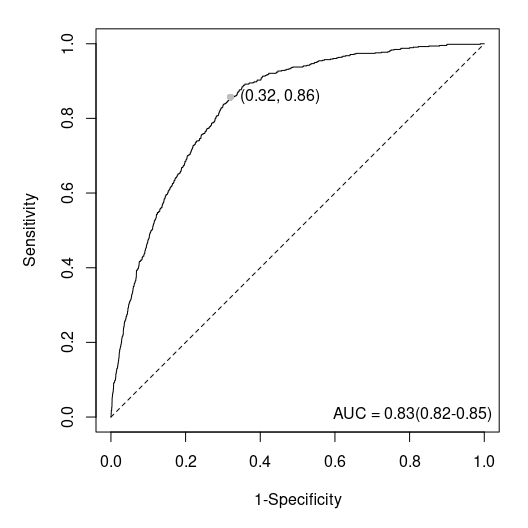

### Deep Learning

Deep learning models for BPD and BPS had 496 parameters, a validation split of 0.3, where 30% of the data was used as validation, and 70% used as training, and 500 epochs to ensure convergence of the algorithm. Convergence is shown in the following table. The deep learning (deep learning) model for BPS had an R2 of 0.43 on the training data and 0.39 on the test data.

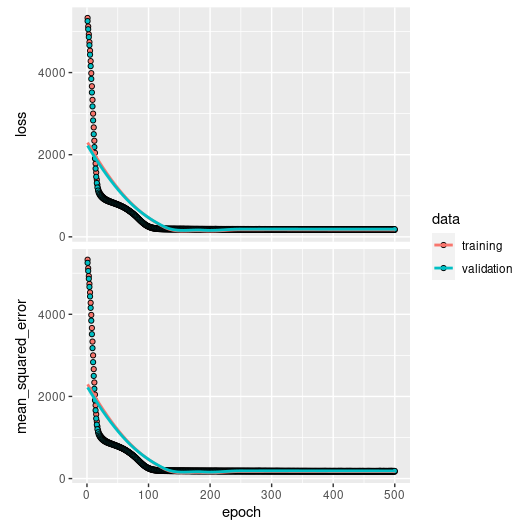

The deep learning model for BPD had and R2 of 0.34 on the training data and 0.28 on the test data.

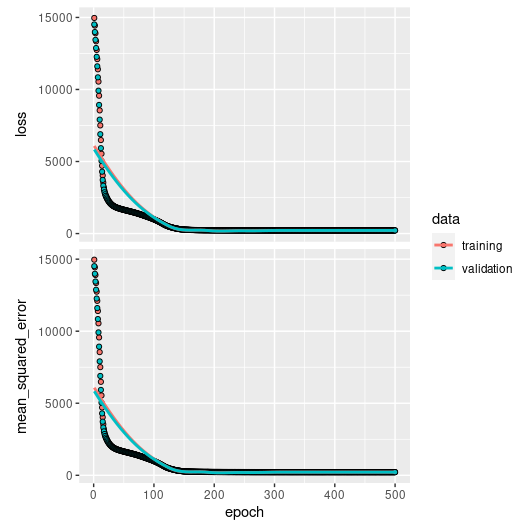

The deep learning model for Diabetes produced an ROC curve with an AUC of 0.86 on the training data and identified a cutoff of 0.16 that maximizes the sum of sensitivity and specificity.


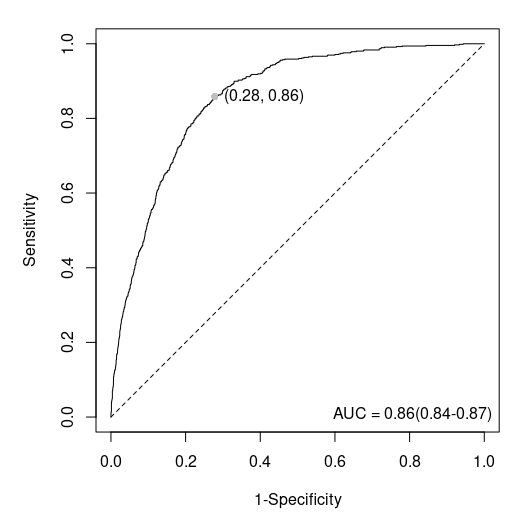

 On the test data, the specificity of the deep learning model for Diabetes was 0.69 and the sensitivity was 0.76. The accuracy of the deep learing model is 74.3%.

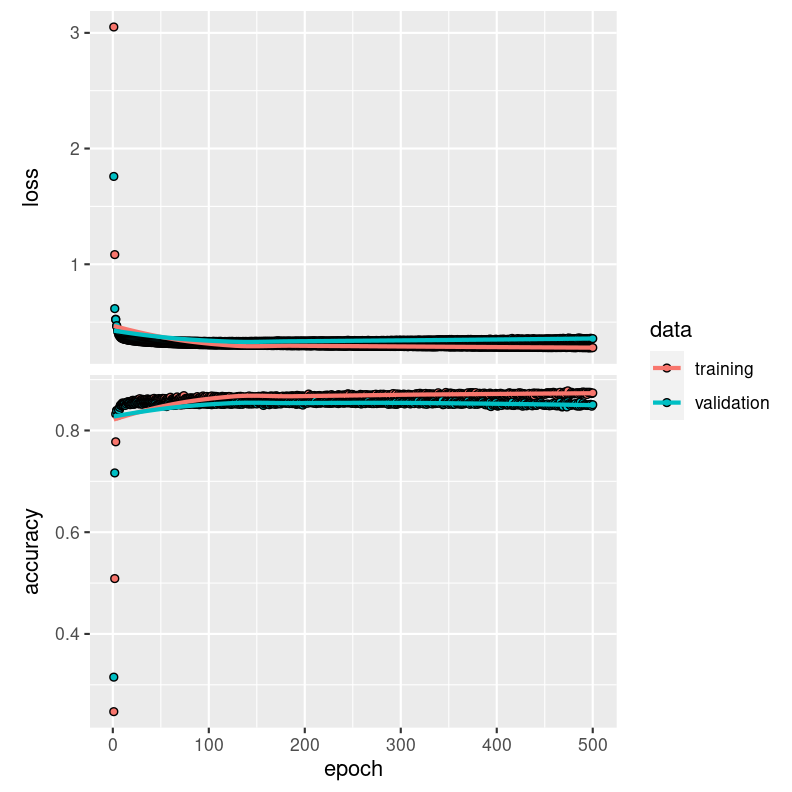

From the perspective of the machine learning model, in the example where it says that you have cancer, then it has a 84 percent chance that it is correct. This is seen through a simple confusion matrix pulled below (at the value 1,1).

In [ ]:
#    prop.table(table(predb, vdata$Diabetes.b), margin = 2)


#predb         0         1
#    0 0.7219938 0.1430746
#    1 0.2780062 0.8569254

# Discussion

This project shines light on things previously known by many distinguished sources. Diabetes is correlated to one's age, blood pressure, and bmi. However, these things still can’t fully explain the data. There is always a chance of this being because of outliers, yet the more simple answer is that I am missing other important attributes that tie in with Diabetes and Hypertension. Both are correlated with one another, but so are other diseases. Infact, with a simple search, we find that 75% of those diagnosed with diabetes are also diagnosed with another chronic condition. Additionally, 44% have at least two more chronic conditions. An important variable which wasn’t considered with this analysis, was type of food intake, and exercise one regularly gets(LifeSciencesIntelligence, 2022).




One of the vocalists in the fight against Diabetes and cardiovascular health, is Dr. Robert Lustig. He advocates for a fundamental seven, where one does the following: be active, keep a healthy weight, learn about cholesterol, don’t smoke or use smokeless tobacco, eat a heart-healthy diet, keep blood pressure healthy, and learn about blood sugar and diabetes (Benjamin, 2017). As an important advocate for “good diet - good life”, he places great importance on sugar intake, processed foods, and exercise as key factors to controlling, reversing, and preventing metabolic diseases, and is a strong advocate that the body is strong enough to repel most medical conditions on its own, if and only if it operates under ideal conditions, which is where his fundamental seven stems from (Heart disease and stroke statistics, 2017).



# Conclusion

I used statistical methods and deep learning models to develop prediction models for BPS, BPD, and Diabetes using data from the NHANES database collected in years of 2017 and 2018. With a clean, final dataset, void of “N/A’s” and missinputs, I randomly partitioned the overall data set of 6483 into a training data set (n=4549) and test data (n=1934). Then, I ean statistical methods and teqniuies to produce statistical models for BPS and BPD, which explained about 30%-40% of the variation in the training data, with similar yet slightly smaller performance on the validation dataset. The deep learning models performed slightly better on both the training and test data for both BPS and BPD. However, a large portion of variability (about 60%) was still unexplained. Clearly, in the future, I wish to add some other variables collected from the same organization, with diet choices and exercise also pertaining a large stake into the unexplained variance. Adding these additional information in the prediction models may significantly improve the prediction performance of both statistical and deep learning models. Other endpoints may also be analyzed using a similar approach (e.g., Cancer). I was able to obtain a significant reading into the diabetes model, which garnered an overalal accuracy of 74.3%, with an AUC value of 0.86 on the ROC curve.


# References


> *Benjamin, E. J., Blaha, M. J., Chiuve, S. E., Cushman, M., Das, S. R., Deo, R., de Ferranti, S. D., Floyd, J., Fornage, M., Gillespie, C., Isasi, C. R., Jiménez, M. C., Jordan, L. C., Judd, S. E., Lackland, D., Lichtman, J. H., Lisabeth, L., Liu, S., Longenecker, C. T., … Muntner, P.* (2017). Heart disease and stroke statistics—2017 update: A report from the American Heart Association. Circulation, 135(10). https://doi.org/10.1161/cir.0000000000000485


> *Centers for Disease Control and Prevention.* (2015, November 6). Health policy data requests - percent of U.S. adults 55 and over with chronic conditions. Centers for Disease Control and Prevention. https://www.cdc.gov/nchs/health_policy/adult_chronic_conditions.htm

> *Centers for Disease Control and Prevention.* (2020, September 17). Prevalence of multiple chronic conditions among US adults, 2018. Centers for Disease Control and Prevention. https://www.cdc.gov/pcd/issues/2020/20_0130.htm

> *Centers for Disease Control and Prevention.* (2020). Nhanes questionnaires, datasets, and related documentation. Centers for Disease Control and Prevention. https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017

> *Diabetesjournals.org.* (2020). https://diabetesjournals.org/care/article/doi/10.2337/dci23-0085/153797/Econo[link text](https://)mic-Costs-of-Diabetes-in-the-U-S-in-2022

> *Hayes, T. O., Tara O’Neill HayesFormer Director of Human Welfare PolicyTara O’Neill Hayes is the former Director of Human Welfare Policy at the American Action Forum., Trump’s Proposed 10 Percent Tariff: Considering the ImpactTom Lee, Lee, T., The Earned Income Tax Credit: Program Design, Gray, G., Antitrust Lawsuits Seek to Bust Realtor Broker Fees SchemeFred Ashton, Ashton, F., Labor Impacts of Recovery from Severe Mental IllnessesIsabella Hindley, &amp; Hindley, I.* (2020, November 24). Chronic disease in the United States: A worsening health and economic crisis. AAF. https://www.americanactionforum.org/research/chronic-disease-in-the-united-states-a-worsening-health-and-economic-crisis/

> *Heart disease and stroke statistics—2017 update.* (n.d.). https://www.ahajournals.org/doi/10.1161/CIR.0000000000000485

> *Inc, H.*(2023, July 17). Chronic disease costs a lot: How care management can help. https://www.highmark.com/employer/thought-leadership/health-insurance-cost-management/cost-of-chronic-health-conditions#:~:text=The%20total%20cost%20of%20managing,about%20%243.7%20trillion%20a%20year.

> *LifeSciencesIntelligence.* (2022, August 31). Chronic disease rates and management strain the US Healthcare System. https://lifesciencesintelligence.com/features/chronic-disease-rates-and-management-strain-the-us-healthcare-system#:~:text=Direct%20healthcare%20costs%20for%20individuals,their%20counterparts%20without%20chronic%20disease.

> *Living with diabetes puts you at greater risk of 57 other diseases.* NCD Alliance. (2022, April 25). https://ncdalliance.org/news-events/news/living-with-diabetes-puts-you-at-greater-risk-of-57-other-diseases#:~:text=At%20the%20time%20of%20their,vascular%20inflammation%2C%20and%20high%20cholesterol.


# Appendacies

# Section 1: Types of data produced
This project will produce: statistical and deep learning machine models on predicting BPD (Blood pressure systolic) BPD (Blood Pressure Dyastolic), and Diabetes. All data and data analysis is performed in a RMD file, so reproducing the data presented in the analysis is as simple as running the program in RStudio or Posit Cloud. All data is managed as XPT file, csv files, and pdfs. The data itself is preserved in XPT files and a singular csv file.

The data has already been collected. The data was collected through questionares as parrt of the NHANES derective. They divide the United States into randomized sections, and partition multiple communities/blocks to questioning and accurate data gathering. This is done through the form of two visits across two days. The languages, R and python, including matplotlib, pandas, and numpy, are used in these analysis. All data gathered by NHANES is already stored on their website, and is in the form of an XPT file.

There is an expected 10-12 MB of data gathered and analyzed. The RMD file and pdf are not included, as they combine to a 7 MB total by themselves.

# Section 2: Standard for data and metadata
Data will be described using XPT metadata, accessable as a SAS file, and accompanied by readme.txt files providing information on field methods and procedures.

Data will be collected in plain text, R, python, HTML, XPT, and Latex.

Our data will be stored in XPT files. These files can be converted into csv files in both R and python. The csv file we produced is a result of inner merging all of the datasets on the proprietary key of a specific person's sequence number (seqn), and exproting the dataset as a csv file, so it is more readable in tools such as excel.

Answers from the questionare are stored as integer values under columns that are short-named, all with a readme file that explains proper documentation. These integers will represent different values for data collected.

# Section 3: Policies for access and sharing
The research will span multiple years, and thus there will be incrementally more data available comparatively to the years prior.

The data produced through questionnaires is and will continue to be accessible to the public through the domain of NHANES, which is under the CDC. Those who wish to access more sensitive data will have to complete proper paperwork and write a statement as to why they need that specific data.

Because of confidentiality issues, each subject will be assigned an arbitrary code. Personal information will be permanently removed prior to data analysis. All data will be stored and backed-up by a program director or manager. The de-identified electronic data will be preserved on DVDs, the NHANES website, and external hard drives. Completed surveys, consent forms, and written analyses of people will be stored in a locked file cabinet accessible only to those with clearance. For more personal surveys, that are privy to extremely sensitive data, need special clearance from the requester, with a proper background check with a written statement as to why they need said data.

We do not anticipate for there to be any intellectual property issues to arise from this data. However, if there are any to arise, our team will be sure to send a team over to discuss the materials under investigation, and access will be granted to sensitive data, or withheld.

Personally identifying information will be removed after the surveys are completed. Access will therefore not exist to be able to associate one with this information.

Data is available to the public for free use, however, there is a restriction that comes to the sensitive data, where a team or entity will submit a request alongside their problem statement and research purposes.

There will be no period of exclusive use by the data collectors.

As there are no restrictions on our data, there is no specific structure in which we would send our data if requested for journal/publishing reasons.

All basic data is stored as an XPT. If a user or entity wishes the form of data to come in any other form, there is nothing we will do. We will only store data as XPT, or csv if we make our own analysis on said data.

# Section 4: Policies for access and sharing
The data collected and stored is provided by NHANES through questionnaire data. They are not taken by any third party source. The reuse of this data is free and accessible to any who have access to the internet.

In order to ensure that proper credit is given, and future redistribution of the data should include citation of NHANES and the specific database used.

The data will be shared to the public with no restrictions, and thus requires no new policies if one wants to build off the data. What is required is to maintain the same notation and values of the original dataset.

Shared datasets will be made publicly available through metadata that will include all relevant rights of reuse. This is where the information for communication policies will take place. Unless the research involves the use of specific and sensitive data, there will be no need for interference with an entity or study.

# Section 5: Plans for data archiving and preservation of access
All data will be maintained for as long as possible through the foreseeable future. If data becomes hard to manage, we will keep the data around as metadata for a decade.

The NHANES database is a long term project funded by the CDC, so it will be up for the foreseeable future, unless something drastic was to change, the site should remain.

Data will be stored on departmental servers as they are being developed. They will be sent to repositories once completed and thoroughly examined for correctness. This data is on NHANES.

There is no physical data to be stored.

The data is estimated to last as long as the website. As mentioned prior, if management of the data becomes infeasible, then data will last approximately a decade.

The primary investigators are expected to continue their research, and develop and aggregate data into an XPT file which is to be published for the general public's use.

